In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from torch.utils.data import DataLoader
# import train test split
from sklearn.model_selection import train_test_split

In [2]:
sys.path.append('dev/')
from dev.yso_model_loaders import S___SMI, SPUBHMI
from dev.spectrum_net import reshape_spectral_aperture_data, SpectrumPredictor

In [3]:
base_path_yso = '/Users/ratzenboe/Documents/work/data_local/spectal_models/yso_models/models_richardson24/'
# yso_model = S___SMI(base_path_yso + 's---smi')
yso_model = SPUBHMI(base_path_yso + 'spubhmi')

Loading SPUBHMI model...
SPUBHMI model loaded.


In [4]:
X_star = yso_model.X_input
distance_pc = np.full(X_star.shape[0], fill_value=1000.) * u.pc
fnu = yso_model.sed
wave = yso_model.wave
aperture = yso_model.apertures
# Transform the spectra to flam
flam = yso_model.transform_sed(yso_model.y_output, distance_pc)

In [5]:
# plt.loglog(wave, flam[0].T);

In [6]:
X_full, Y_full = reshape_spectral_aperture_data(X_star, flam.value, aperture.value)
X_full[:, -1] = np.log10(X_full[:, -1])

X_train, X_val, y_train, y_val = train_test_split(
    X_full, Y_full, test_size=0.1, random_state=42, shuffle=True
)

In [11]:
predictor = SpectrumPredictor(
    input_dim=X_train.shape[-1], output_dim=Y_full.shape[-1],
    hidden_dims=(2024, 2024), dropout=0.1
)
predictor.train_model(
    X_train, y_train,
    X_val=X_val, Y_val=y_val,
    n_epochs=100, batch_size=2**13
)

Epoch   1 | Train Loss: 0.057376 | Val Loss: 5.094037
Epoch   2 | Train Loss: 0.031055 | Val Loss: 3.631703
Epoch   3 | Train Loss: 0.024870 | Val Loss: 3.087975
Epoch   4 | Train Loss: 0.022354 | Val Loss: 2.848480
Epoch   5 | Train Loss: 0.020784 | Val Loss: 2.747218
Epoch   6 | Train Loss: 0.019608 | Val Loss: 2.520997
Epoch   7 | Train Loss: 0.018696 | Val Loss: 2.413112
Epoch   8 | Train Loss: 0.018013 | Val Loss: 2.261323
Epoch   9 | Train Loss: 0.017465 | Val Loss: 2.220381
Epoch  10 | Train Loss: 0.016993 | Val Loss: 2.137978


KeyboardInterrupt: 

In [15]:
predictor

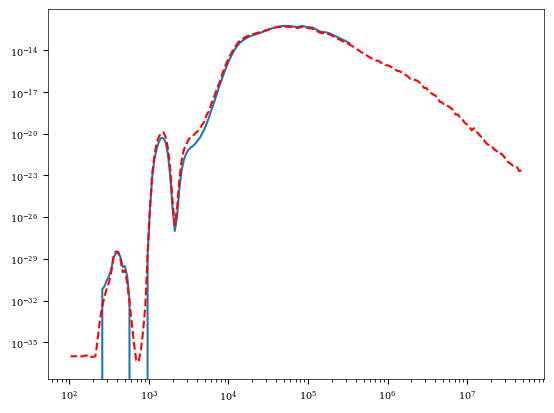

In [20]:
idx = np.random.choice(X_val.shape[0])
eps = np.random.normal(0, 1, X_val.shape[-1]) * 1e-1
f_pred = predictor.predict_flux(X_val[idx]) #+eps)

plt.loglog(wave, y_val[idx])
plt.loglog(wave, f_pred, 'r--');

In [76]:
X_val.shape

(19998, 4)

2.668833524829301e-10